# Clustering 

## 1. DBSCAN
Using DBSCAN iterate (for-loop) through different values of `min_samples` (1 to 10) and `epsilon` (.05 to .5, in steps of .01)  to find clusters in the road-data used in the Lesson and calculate the Silohouette Coeff for `min_samples` and `epsilon`. Plot **_one_** line plot with the multiple lines generated from the min_samples and epsilon values. Use a 2D array to store the SilCoeff values, one dimension represents `min_samples`, the other represents epsilon.

Expecting a plot of `epsilon` vs `sil_score`.

In [55]:
import pandas as pd
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['font.size'] = 14
from sklearn.cluster import KMeans
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [96]:
road = pd.read_csv('/Users/meganrahrig/Desktop/JHU/Machine Learning - SummerQ24/Mod 8/3D_spatial_network.txt', header=None, names=['osm', 'lat','lon','alt'])
road = road.drop(['osm'], axis=1).sample(1000)
#road.head()

In [218]:
#Ranges for min samples and epsilon
min_samples_range = range(1, 11)
eps_range = np.arange(0.05, 1, 0.01)

In [219]:
N = 7
XX = road.copy()
#km = KMeans(n_clusters=N, random_state=1)
road['cluster'] = km.fit_predict(road[['lon', 'lat', 'alt']])

In [220]:
dbscan = DBSCAN(eps=.12)
XX.cluster = dbscan.fit_predict(XX[['lat','lon', 'alt']])

In [221]:
#Silhouette Coefficients
all_scores = np.zeros((len(min_samples_range), len(eps_range)))

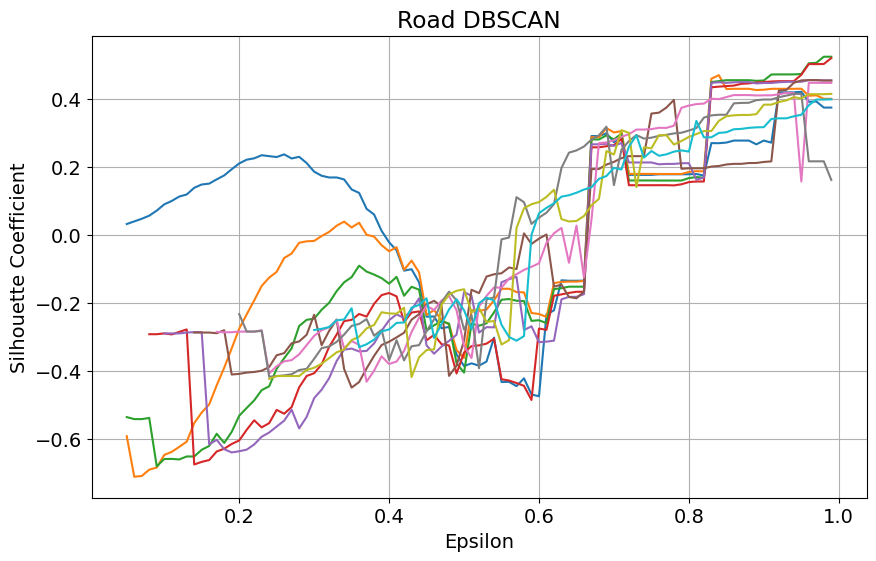

In [222]:
for i, min_samples in enumerate(min_samples_range):
    for j, eps in enumerate(eps_range):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(XX[['lat', 'lon', 'alt']])
        if len(np.unique(clusters)) > 1:
           silhouette_avg = silhouette_score(XX[['lat', 'lon', 'alt']], clusters)
           all_scores[i, j] = silhouette_avg
        else:
            all_scores[i, j] = np.nan  

#Plot
plt.figure(figsize=(10, 6))
for i, min_samples in enumerate(min_samples_range):
    plt.plot(eps_range, all_scores[i, :], label=f'min_samples = {min_samples}')

plt.title('Road DBSCAN')
plt.xlabel('Epsilon')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)
plt.show()

## 2. Clustering your own data
Using your own data, find relevant clusters/groups within your data (repeat the above). If your data is labeled with a class that you are attempting to predict, be sure to not use it in training and clustering. 

You may use the labels to compare with predictions to show how well the clustering performed using one of the clustering metrics (http://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation). 

If you don't have labels, use the silhouette coefficient to show performance. Find the optimal fit for your data but you don't need to be as exhaustive as above.

Additionally, show the clusters in 2D or 3D plots. 

As a bonus, try using PCA first to condense your data from N columns to less than N.

Two items are expected: 
- Metric Evaluation Plot (like in 1.)
- Plots of the clustered data

In [180]:
country = pd.read_csv('/Users/meganrahrig/Desktop/JHU/Machine Learning - SummerQ24/Mod 8/data.csv', header=None, names=['Country', 'AveragScore','SafetySecurity','PersonelFreedom','Governance', 'SocialCapital','InvestmentEnvironment','EnterpriseConditions','MarketAccessInfrastructure','EconomicQuality','LivingConditions','Health','Education','NaturalEnvironment'])
country = country.drop(['Country'], axis=1)
country = country.drop(country.index[0])
#country.head()

In [181]:
countryX = country.copy()

In [182]:
N = 7
countryX = countryX[['LivingConditions', 'InvestmentEnvironment', 'AveragScore']]
km = KMeans(n_clusters=N, random_state=1)
countryX['cluster'] = km.fit_predict(countryX[['LivingConditions', 'InvestmentEnvironment', 'AveragScore']])

In [183]:
set(km.labels_)
dbscan = DBSCAN(eps=.12)
countryX.cluster = dbscan.fit_predict(countryX[['LivingConditions', 'InvestmentEnvironment', 'AveragScore']])

In [212]:
#Different range to display data better
min_samples_range = range(1,10)
eps_range = np.arange(0.1, 8.0, 0.2)

In [213]:
all_scores = np.zeros((len(min_samples_range), len(eps_range)))

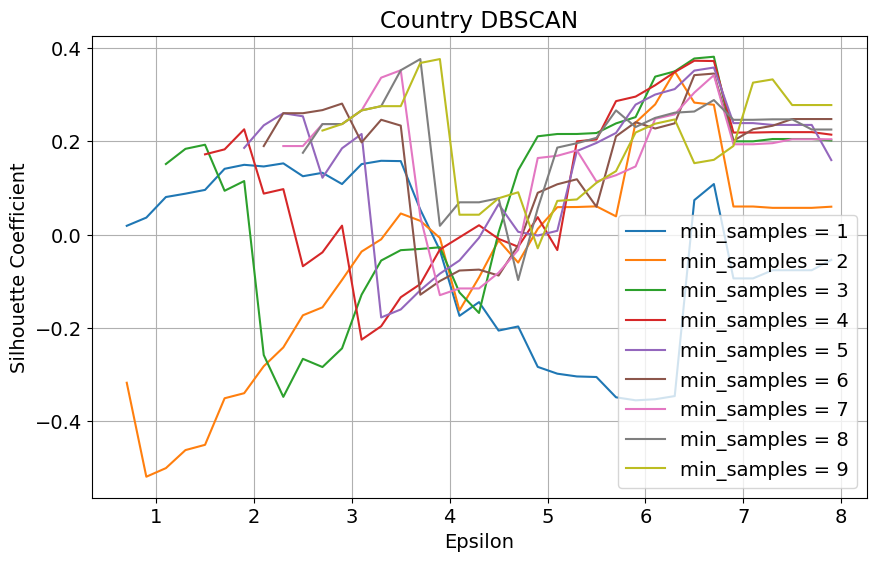

In [214]:
#Loop
for i, min_samples in enumerate(min_samples_range):
    for j, eps in enumerate(eps_range):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(countryX[['LivingConditions', 'InvestmentEnvironment', 'AveragScore']])
        unique_clusters = np.unique(clusters)
        if len(unique_clusters) > 1 and len(unique_clusters) < len(countryX):
            silhouette_avg = silhouette_score(countryX[['LivingConditions', 'InvestmentEnvironment', 'AveragScore']], clusters)
            all_scores[i, j] = silhouette_avg
        else:
            all_scores[i, j] = np.nan

#Plot
plt.figure(figsize=(10, 6))
for i, min_samples in enumerate(min_samples_range):
    plt.plot(eps_range, all_scores[i, :], label=f'min_samples = {min_samples}')

plt.title('Country DBSCAN')
plt.xlabel('Epsilon')
plt.ylabel('Silhouette Coefficient')
plt.legend()
plt.grid(True)
plt.show()

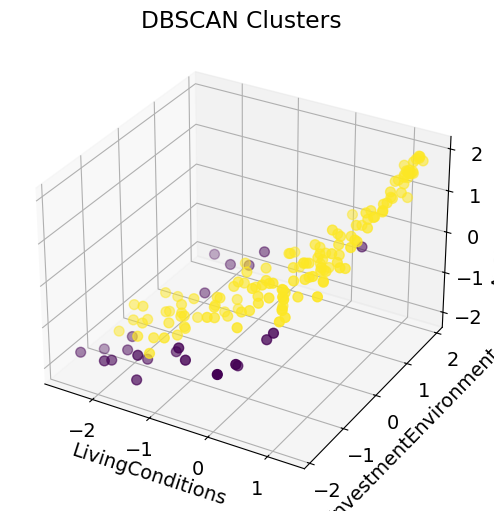

In [217]:
#Scale to make plot work
data = countryX[['LivingConditions', 'InvestmentEnvironment', 'AveragScore']].to_numpy()
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

#Get multiple clusters and update
eps = 0.4
min_samples = 6
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(data_scaled)
unique_clusters = np.unique(clusters)

#Plot 3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_scaled[:, 0], data_scaled[:, 1], data_scaled[:, 2], c=clusters, cmap='viridis', s=50)
ax.set_title('DBSCAN Clusters')
ax.set_xlabel('LivingConditions')
ax.set_ylabel('InvestmentEnvironment')
ax.set_zlabel('AveragScore')
plt.show()